In [56]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

import pickle
import numpy as np


mpl.rcParams.update({
    "pdf.fonttype": 42,            # editable text in Adobe Illustrator
    "ps.fonttype": 42,             # editable text in Adobe Illustrator
    
    "figure.dpi": 200,
    "savefig.dpi": 600,              # very high-res when saving
    "savefig.format": "pdf",         # vector output preferred

    # Fonts
    "font.family": "serif",
    "font.serif": ["Times New Roman"],  # IEEE default

    # Axes
    "axes.linewidth": 1.5,
    
    # Lines
    "lines.linewidth": 2,
})


DATA_ROOT = Path(os.path.realpath('__file__')).parent.parent.parent.parent / "logs" / "zero/hector_flat"
data_dir = DATA_ROOT / "2025-10-14_12-38-06" / "logs"

In [57]:
base_pos_idx = slice(0, 3)   # x, y, z
base_lin_vel_idx = slice(3, 6)   # x, y, z
base_ang_vel_idx = slice(6, 9)   # roll, pitch, yaw
projected_gravity_idx = slice(9, 12)  # x, y, z
velocity_commands_idx = slice(12, 15)  # x, y, yaw
joint_pos_idx = slice(15, 25)  # 10 joints
joint_vel_idx = slice(25, 35)  # 10 joints
# joint_torque_idx = slice(86, 123)  # 10 joints

### Hard contact results

In [142]:
# data_path = data_dir / "hard_contact_v0.0"
# data_path = data_dir / "hard_contact_v0.1"
data_path = data_dir / "hard_contact_v0.5"

policy_obs_path = (data_path / "obs/obs.pkl").as_posix()
contact_obs_path = (data_path / "contact/contact.pkl").as_posix()

with open(policy_obs_path, "rb") as f:
    policy_obs = pickle.load(f)
    policy_obs = np.array(policy_obs).squeeze(1)

with open(contact_obs_path, "rb") as f:
    contact_obs = pickle.load(f)
    contact_obs = np.array(contact_obs).squeeze(1)
print(f"policy_obs shape: {policy_obs.shape}")
print(f"contact_obs shape: {contact_obs.shape}")


hard_contact_data = {}
hard_contact_data["base_pos"] = policy_obs[:, :, base_pos_idx]
hard_contact_data["base_lin_vel"] = policy_obs[:, :, base_lin_vel_idx]
hard_contact_data["base_ang_vel"] = policy_obs[:, :, base_ang_vel_idx]
hard_contact_data["projected_gravity"] = policy_obs[:, :, projected_gravity_idx]
hard_contact_data["velocity_commands"] = policy_obs[:, :, velocity_commands_idx]
hard_contact_data["joint_pos"] = policy_obs[:, :, joint_pos_idx]
hard_contact_data["joint_vel"] = policy_obs[:, :, joint_vel_idx]
# hard_contact_data["joint_torque"] = policy_obs[:, :, joint_torque_idx]
hard_contact_data["left_force"] = contact_obs[:, :, 0:3]
hard_contact_data["right_force"] = contact_obs[:, :, 3:6]

policy_obs shape: (1, 2000, 50)
contact_obs shape: (1, 2000, 6)


### Soft contact results

In [143]:
# data_path = data_dir / "soft_contact_v0.0"
# data_path = data_dir / "soft_contact_v0.1"
data_path = data_dir / "soft_contact_v0.5"

policy_obs_path = (data_path / "obs/obs.pkl").as_posix()
contact_obs_path = (data_path / "contact/contact.pkl").as_posix()

with open(policy_obs_path, "rb") as f:
    policy_obs = pickle.load(f)
    policy_obs = np.array(policy_obs).squeeze(1)

with open(contact_obs_path, "rb") as f:
    contact_obs = pickle.load(f)
    contact_obs = np.array(contact_obs).squeeze(1)
print(f"policy_obs shape: {policy_obs.shape}")
print(f"contact_obs shape: {contact_obs.shape}")

soft_contact_data = {}
soft_contact_data["base_pos"] = policy_obs[:, :, base_pos_idx]
soft_contact_data["base_lin_vel"] = policy_obs[:, :, base_lin_vel_idx]
soft_contact_data["base_ang_vel"] = policy_obs[:, :, base_ang_vel_idx]
soft_contact_data["projected_gravity"] = policy_obs[:, :, projected_gravity_idx]
soft_contact_data["velocity_commands"] = policy_obs[:, :, velocity_commands_idx]
soft_contact_data["joint_pos"] = policy_obs[:, :, joint_pos_idx]
soft_contact_data["joint_vel"] = policy_obs[:, :, joint_vel_idx]
# soft_contact_data["joint_torque"] = policy_obs[:, :, joint_torque_idx]
soft_contact_data["left_force"] = contact_obs[:, :, 0:3]
soft_contact_data["right_force"] = contact_obs[:, :, 3:6]

policy_obs shape: (1, 2000, 50)
contact_obs shape: (1, 2000, 6)


### Plot

#### contact force

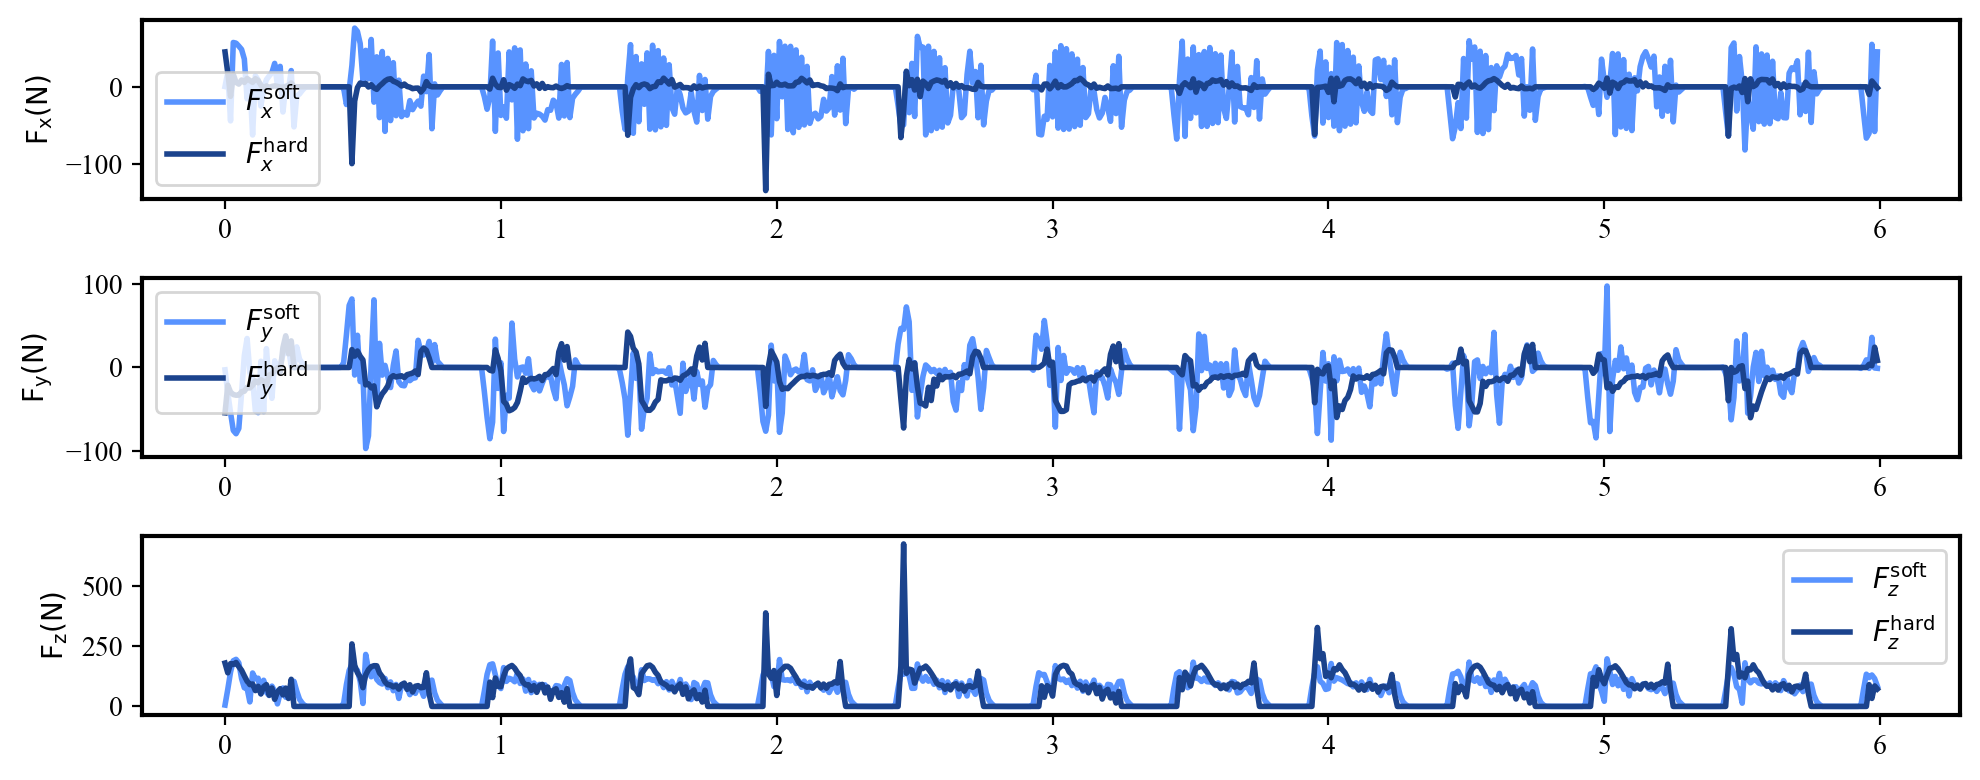

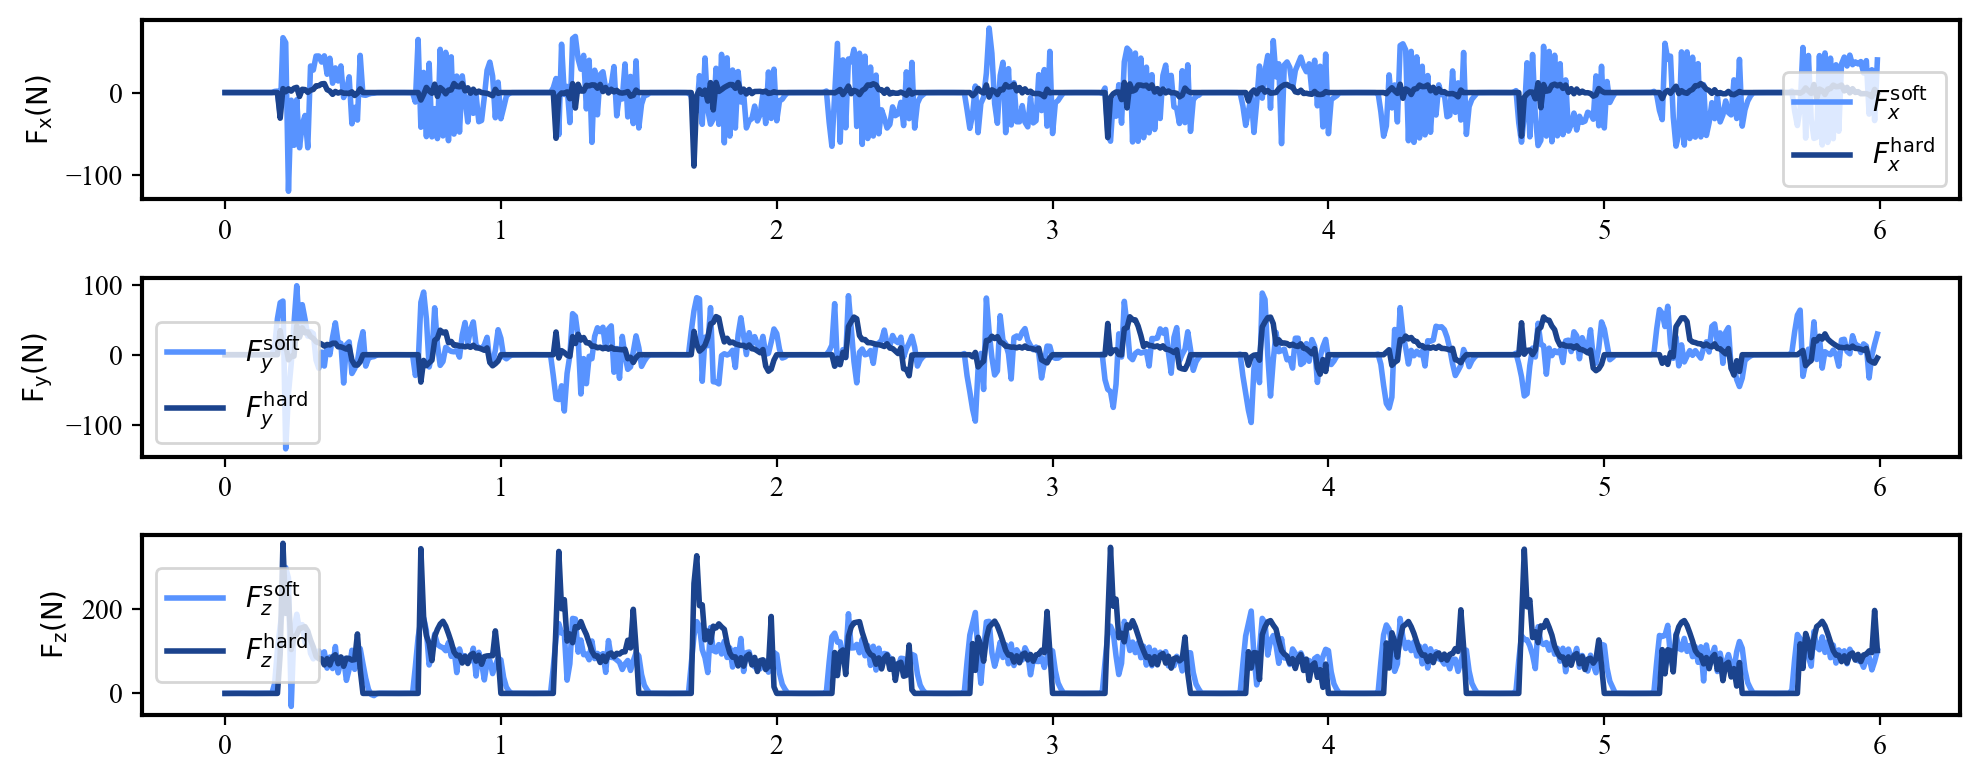

In [136]:
ENV_ID = 0
dt = 1/100
t = dt * np.arange(0, 2000)
t_range = slice(0, 600)

# plot colors
colors = ["#1B438D", "#5893FF"]

# left force
fig, axs = plt.subplots(3, 1, figsize=(10, 4))
axs[0].plot(t[t_range], soft_contact_data["left_force"][ENV_ID, t_range, 0], label=r"$F_x^\text{soft}$", color=colors[1])
axs[0].plot(t[t_range], hard_contact_data["left_force"][ENV_ID, t_range, 0], label=r"$F_x^\text{hard}$", color=colors[0])
axs[0].legend()
axs[0].set_ylabel(r"$\mathrm{F_x} (\mathrm{N})$")

axs[1].plot(t[t_range], soft_contact_data["left_force"][ENV_ID, t_range, 1], label=r"$F_y^\text{soft}$", color=colors[1])
axs[1].plot(t[t_range], hard_contact_data["left_force"][ENV_ID, t_range, 1], label=r"$F_y^\text{hard}$", color=colors[0])
axs[1].legend()
axs[1].set_ylabel(r"$\mathrm{F_y} (\mathrm{N})$")

axs[2].plot(t[t_range], soft_contact_data["left_force"][ENV_ID, t_range, 2], label=r"$F_z^\text{soft}$", color=colors[1])
axs[2].plot(t[t_range], hard_contact_data["left_force"][ENV_ID, t_range, 2], label=r"$F_z^\text{hard}$", color=colors[0])
axs[2].legend()
axs[2].set_ylabel(r"$\mathrm{F_z} (\mathrm{N})$")

fig.tight_layout()
plt.savefig("left_force_v0.1.pdf")
plt.show()

# right force
fig, axs = plt.subplots(3, 1, figsize=(10, 4))
axs[0].plot(t[t_range], soft_contact_data["right_force"][ENV_ID, t_range, 0], label=r"$F_x^\text{soft}$", color=colors[1])
axs[0].plot(t[t_range], hard_contact_data["right_force"][ENV_ID, t_range, 0], label=r"$F_x^\text{hard}$", color=colors[0])
axs[0].legend()
axs[0].set_ylabel(r"$\mathrm{F_x} (\mathrm{N})$")

axs[1].plot(t[t_range], soft_contact_data["right_force"][ENV_ID, t_range, 1], label=r"$F_y^\text{soft}$", color=colors[1])
axs[1].plot(t[t_range], hard_contact_data["right_force"][ENV_ID, t_range, 1], label=r"$F_y^\text{hard}$", color=colors[0])
axs[1].legend()
axs[1].set_ylabel(r"$\mathrm{F_y} (\mathrm{N})$")

axs[2].plot(t[t_range], soft_contact_data["right_force"][ENV_ID, t_range, 2], label=r"$F_z^\text{soft}$", color=colors[1])
axs[2].plot(t[t_range], hard_contact_data["right_force"][ENV_ID, t_range, 2], label=r"$F_z^\text{hard}$", color=colors[0])
axs[2].legend()
axs[2].set_ylabel(r"$\mathrm{F_z} (\mathrm{N})$")

fig.tight_layout()
plt.savefig("right_force_v0.1.pdf")
plt.show()

### Position

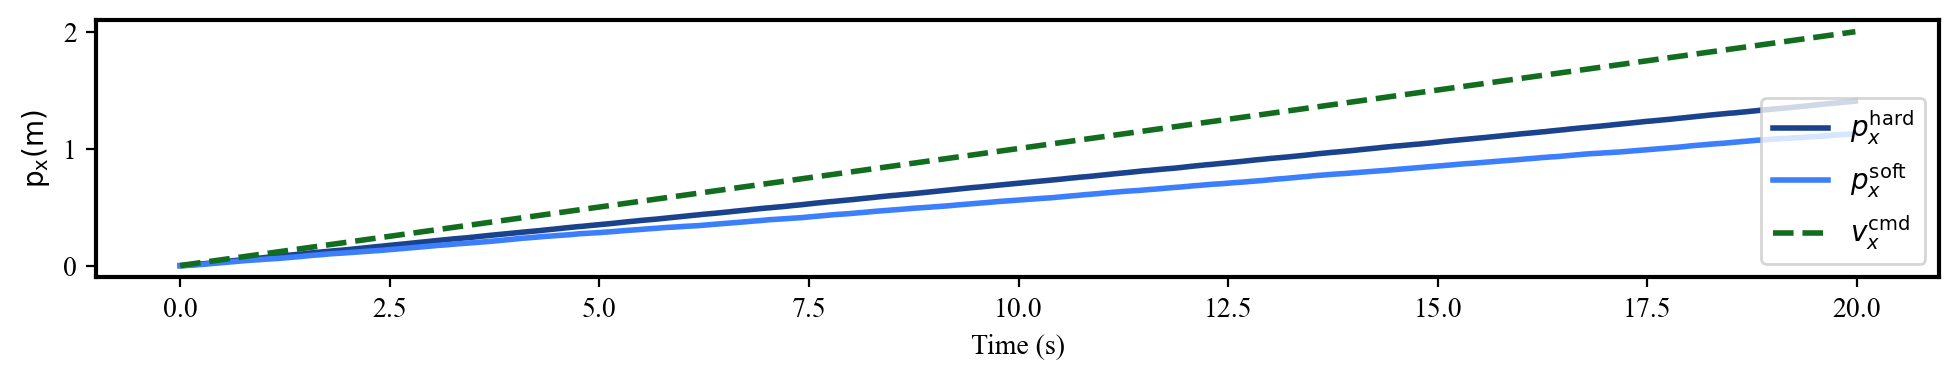

In [137]:
ENV_ID = 0
dt = 1/100
t = dt * np.arange(0, 2000)
t_range = slice(0, 1999)
colors = ["#1B438D", "#3C7FFD"]

# left force
fig, axs = plt.subplots(1, 1, figsize=(10, 2))

axs.plot(t[t_range], 
         hard_contact_data["base_pos"][ENV_ID, t_range, 0]-hard_contact_data["base_pos"][ENV_ID, 0:1, 0], 
         label=r"$p_x^\text{hard}$", color=colors[0])
axs.plot(t[t_range], 
         soft_contact_data["base_pos"][ENV_ID, t_range, 0]-soft_contact_data["base_pos"][ENV_ID, 0:1, 0], 
         label=r"$p_x^\text{soft}$", color=colors[1])
ref_x = (soft_contact_data["velocity_commands"][ENV_ID, t_range, 0]).cumsum() * dt
axs.plot(t[t_range], ref_x, '--', label=r"$v_x^\text{cmd}$", color="#126D1E")
axs.legend(loc='lower right')
axs.set_xlabel("Time (s)")
axs.set_ylabel(r"$\mathrm{p_x} (\mathrm{m})$")
fig.tight_layout()
plt.savefig("position_v0.1.pdf")
plt.show()

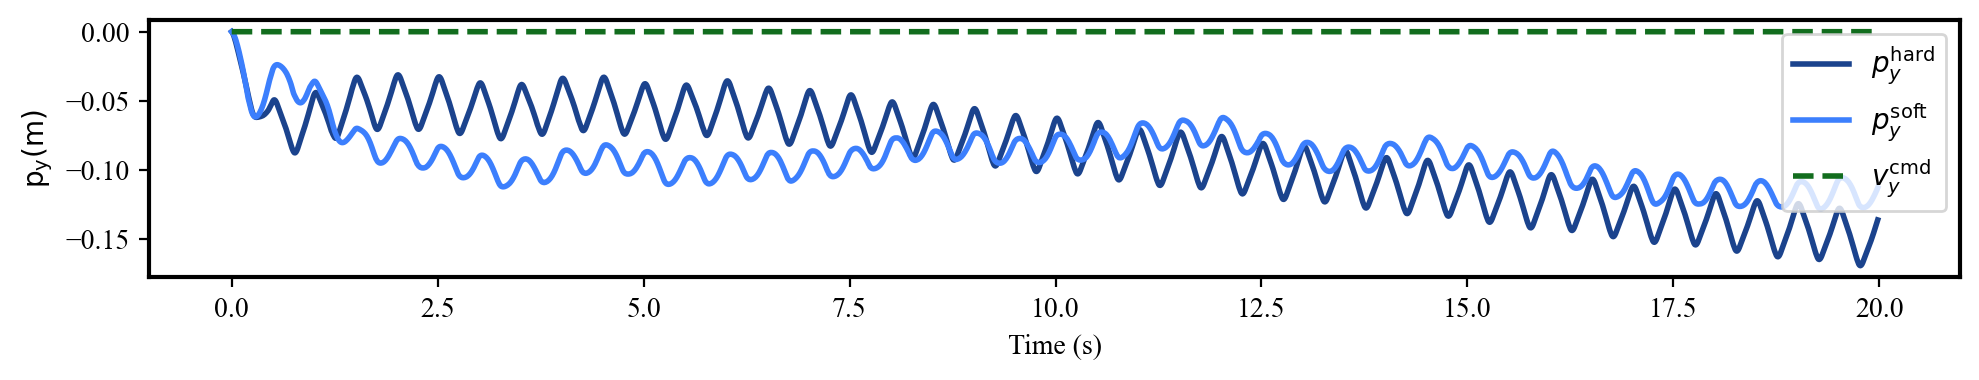

In [122]:
ENV_ID = 0
t = 1/100 * np.arange(0, 2000)
t_range = slice(0, 1999)
colors = ["#1B438D", "#3C7FFD"]

# left force
fig, axs = plt.subplots(1, 1, figsize=(10, 2))

axs.plot(t[t_range], 
         hard_contact_data["base_pos"][ENV_ID, t_range, 1]-hard_contact_data["base_pos"][ENV_ID, 0:1, 1], 
         label=r"$p_y^\text{hard}$", color=colors[0])
axs.plot(t[t_range], 
         soft_contact_data["base_pos"][ENV_ID, t_range, 1]-soft_contact_data["base_pos"][ENV_ID, 0:1, 1], 
         label=r"$p_y^\text{soft}$", color=colors[1])
ref_y = (hard_contact_data["velocity_commands"][ENV_ID, t_range, 1]).cumsum() * dt
axs.plot(t[t_range], ref_y, '--', label=r"$v_y^\text{cmd}$", color="#126D1E")
axs.legend()
axs.set_xlabel("Time (s)")
axs.set_ylabel(r"$\mathrm{p_y} (\mathrm{m})$")
fig.tight_layout()
plt.show()

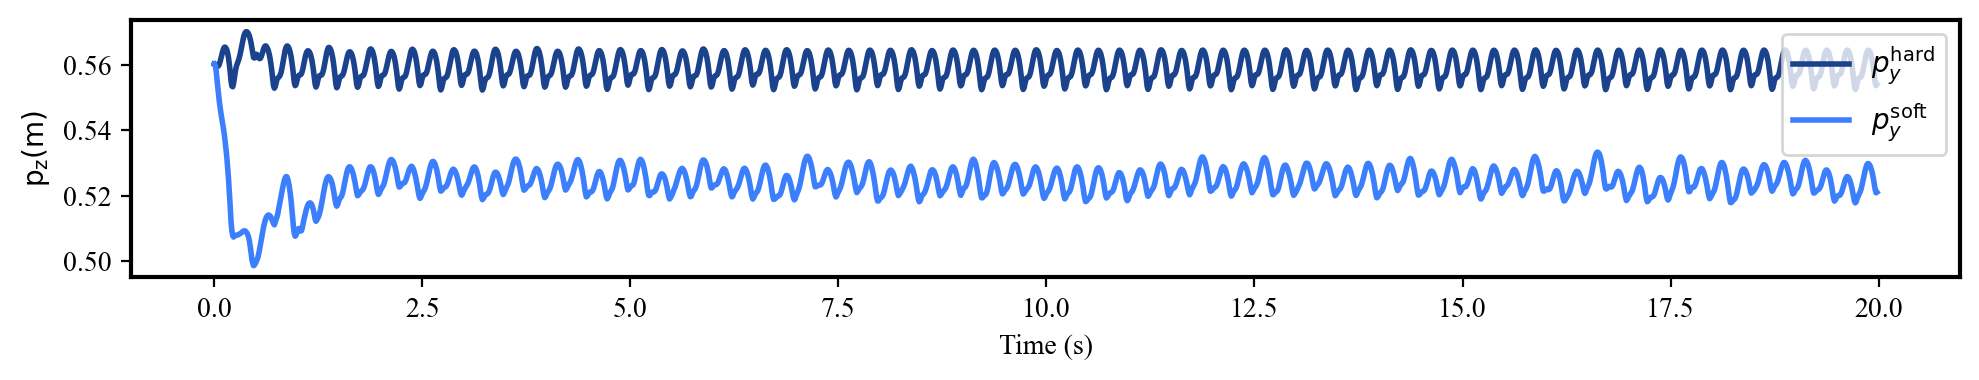

In [144]:
ENV_ID = 0
t = 1/100 * np.arange(0, 2000)
t_range = slice(0, 1999)
colors = ["#1B438D", "#3C7FFD"]

# left force
fig, axs = plt.subplots(1, 1, figsize=(10, 2))

axs.plot(t[t_range], 
         hard_contact_data["base_pos"][ENV_ID, t_range, 2], 
         label=r"$p_y^\text{hard}$", color=colors[0])
axs.plot(t[t_range], 
         soft_contact_data["base_pos"][ENV_ID, t_range, 2], 
         label=r"$p_y^\text{soft}$", color=colors[1])
axs.legend(loc='upper right')
axs.set_xlabel("Time (s)")
axs.set_ylabel(r"$\mathrm{p_z} (\mathrm{m})$")
fig.tight_layout()
plt.show()

### Velocity

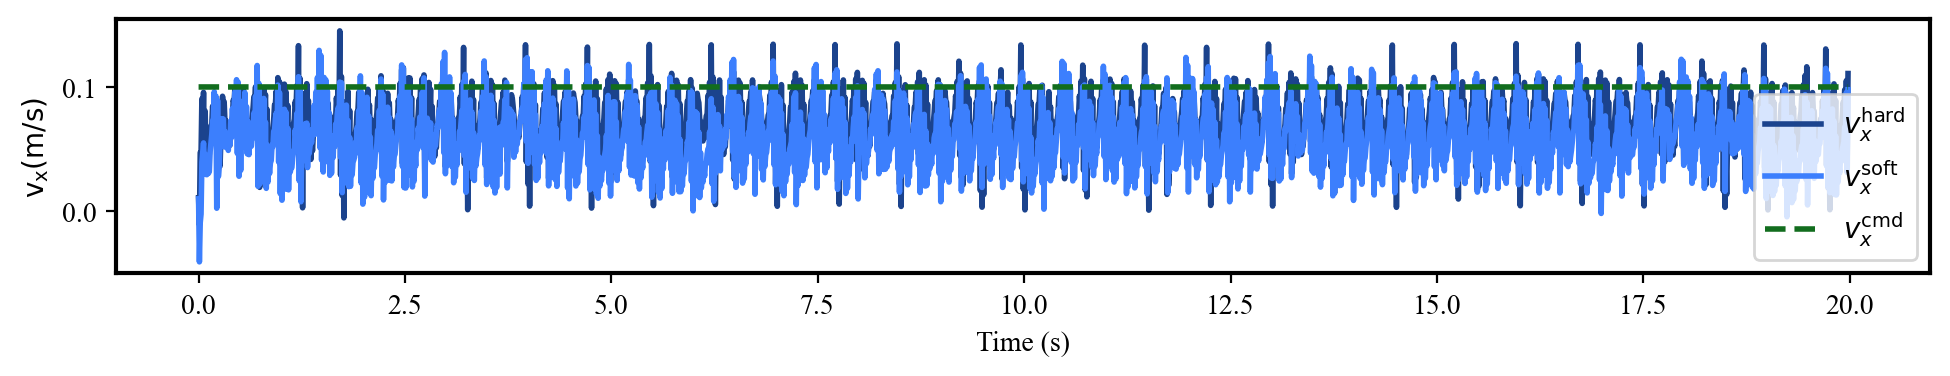

In [138]:
ENV_ID = 0
t = 1/100 * np.arange(0, 2000)
t_range = slice(0, 1999)
colors = ["#1B438D", "#3C7FFD"]

# left force
fig, axs = plt.subplots(1, 1, figsize=(10, 2))

axs.plot(t[t_range], hard_contact_data["base_lin_vel"][ENV_ID, t_range, 0], label=r"$v_x^\text{hard}$", color=colors[0])
axs.plot(t[t_range], soft_contact_data["base_lin_vel"][ENV_ID, t_range, 0], label=r"$v_x^\text{soft}$", color=colors[1])
axs.plot(t[t_range], hard_contact_data["velocity_commands"][ENV_ID, t_range, 0], '--', label=r"$v_x^\text{cmd}$", color="#126D1E")
axs.legend()
axs.set_xlabel("Time (s)")
axs.set_ylabel(r"$\mathrm{v_x} (\mathrm{m/s})$")
fig.tight_layout()
plt.savefig("velocity_v0.1.pdf")
plt.show()

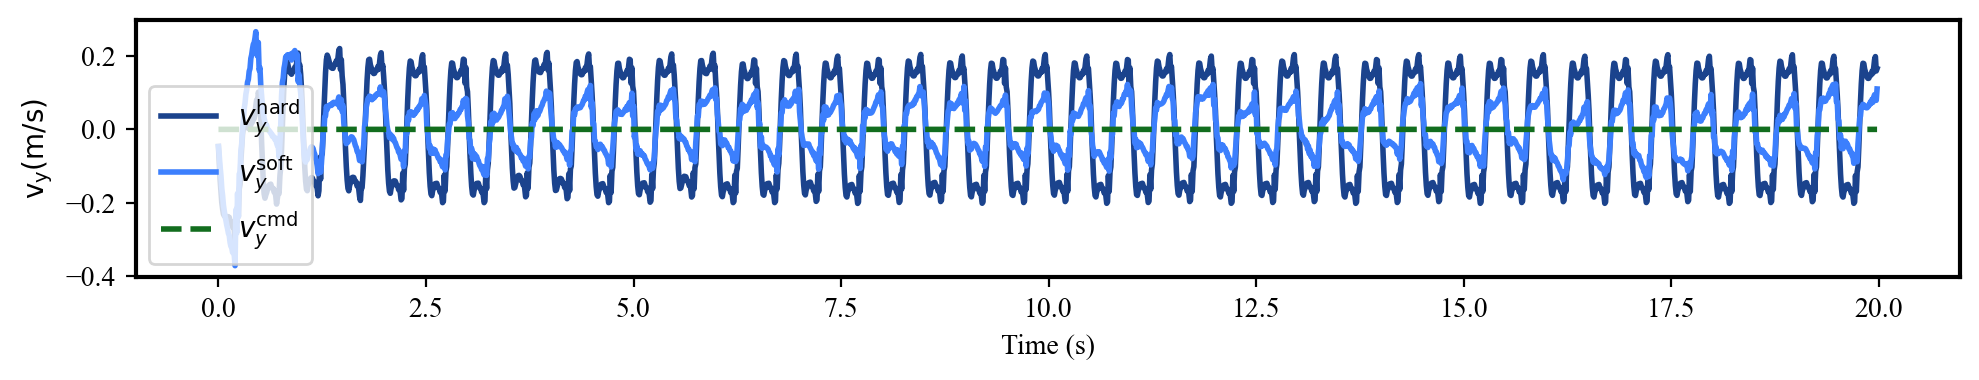

In [125]:
ENV_ID = 0
t = 1/100 * np.arange(0, 2000)
t_range = slice(0, 1999)
colors = ["#1B438D", "#3C7FFD"]

# left force
fig, axs = plt.subplots(1, 1, figsize=(10, 2))

axs.plot(t[t_range], hard_contact_data["base_lin_vel"][ENV_ID, t_range, 1], label=r"$v_y^\text{hard}$", color=colors[0])
axs.plot(t[t_range], soft_contact_data["base_lin_vel"][ENV_ID, t_range, 1], label=r"$v_y^\text{soft}$", color=colors[1])
axs.plot(t[t_range], hard_contact_data["velocity_commands"][ENV_ID, t_range, 1], '--', label=r"$v_y^\text{cmd}$", color="#126D1E")
axs.legend()
axs.set_xlabel("Time (s)")
axs.set_ylabel(r"$\mathrm{v_y} (\mathrm{m/s})$")
fig.tight_layout()
plt.show()

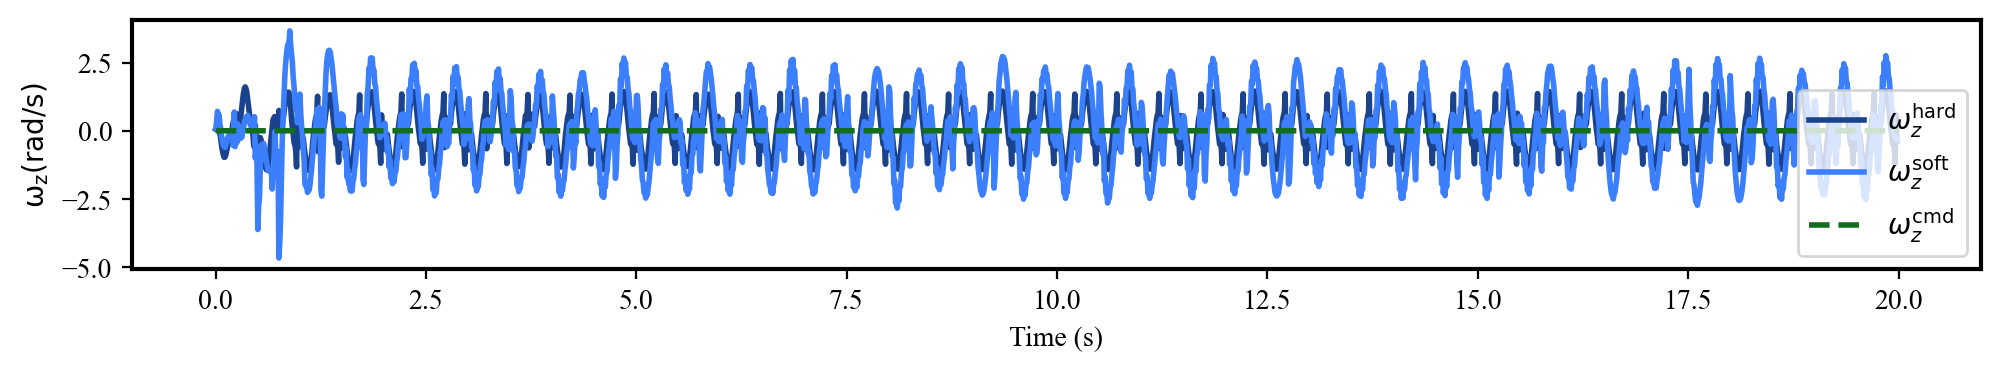

In [126]:
ENV_ID = 0
t = 1/100 * np.arange(0, 2000)
t_range = slice(0, 1999)
colors = ["#1B438D", "#3C7FFD"]

# left force
fig, axs = plt.subplots(1, 1, figsize=(10, 2))

axs.plot(t[t_range], hard_contact_data["base_ang_vel"][ENV_ID, t_range, 2], label=r"$\omega_z^\text{hard}$", color=colors[0])
axs.plot(t[t_range], soft_contact_data["base_ang_vel"][ENV_ID, t_range, 2], label=r"$\omega_z^\text{soft}$", color=colors[1])
axs.plot(t[t_range], hard_contact_data["velocity_commands"][ENV_ID, t_range, 2], '--', label=r"$\omega_z^\text{cmd}$", color="#126D1E")
axs.legend()
axs.set_xlabel("Time (s)")
axs.set_ylabel(r"$\mathrm{\omega_z} (\mathrm{rad/s})$")
fig.tight_layout()
plt.show()